In this Tutorial, we will look at understanding what is stacking and demonstrate how we can use Scikit-Learn library in order to simplify stacking pipelines and create interesting models.

# What is Stacking?
Stacking is a strategy that takes the output of numerous regression or classification models and feeds it into a meta-classifier or regressor.
Stacking, like Random Forests, is an ensemble learning strategy in which the quality of prediction is increased by mixing, often, weak models. </br>
Stacking comes into play when we have numerous models capable of solving a particular problem in different ways each with its own pros and cons. It suggests to use another machine learning model that learns when to use or trust each model in the ensemble.

# So How is stacking different from boosting and bagging?
- Unlike bagging, the models in stacking are usually distinct (e.g., not all decision trees) and fit on the same dataset (e.g. instead of samples of the training dataset).
- Unlike boosting, stacking uses a single model to learn how to integrate the predictions from the contributing models in the most effective way (e.g. instead of a sequence of models that correct the predictions of prior models).

# Architecture of Stacking Models
<img src="https://miro.medium.com/max/2000/1*XsTcX5N6FXQW1bGhS9hxJQ.png" />
Image Credits : https://towardsdatascience.com/stacking-made-easy-with-sklearn-e27a0793c92b

A stacking model's architecture consists of two or more base models, also known as level-0 models, and a meta-model that combines the predictions of the base models, also known as a level-1 model.

Models that are fitted to the training data and whose predictions are compiled are known as Level-0 Models (Base-Models).
Level-1 Model (Meta-Model) is a model that learns how to combine the predictions of the basic models in the most effective way possible.

The most typical method for producing the training dataset for the meta-model is k-fold cross-validation of the base models, with the out-of-fold predictions serving as the foundation for the meta-training model's dataset.

The inputs to the base models, such as inputs of the training data, may also be included in the meta-training model's data. This can give the meta-model more context in terms of how to best combine the meta-predictions. model's



Now Let's look at how we can implement stacking using scikit learn library.
I will be using make_classification() function to create a synthetic binary classification problem with 1,000 examples and 20 input features. We will generate a Madelon-like synthetic data set using Scikit-learn for a classification task. To find out more about the implementation of dataset please visit [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)

In [ ]:
import numpy as np
import pandas as pd
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


Let's implement the classification using SVC, Naive Bayes, KNN , Decision Tree Classsifier and Logistic Regression individually and look at their accuracy first.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1000)

In [ ]:
######## Logistic Regression
clf_lr = LogisticRegression()
print("The Accuracy obtained from Linear Regression is: ")
clf_lr.fit(X_train, y_train).score(X_test, y_test)

The Accuracy obtained from Linear Regression is: 


0.89

In [ ]:
######## SVC
clf_svc = SVC()
print("The Accuracy obtained from SVC is: ")
clf_svc.fit(X_train, y_train).score(X_test, y_test)

The Accuracy obtained from SVC is: 


0.96

In [ ]:
######## Naive Bayes
clf_nb = GaussianNB()
print("The Accuracy obtained from Naive Bayes is: ")
clf_nb.fit(X_train, y_train).score(X_test, y_test)

The Accuracy obtained from Naive Bayes is: 


0.87

In [ ]:
######## Decision Tree Classifier
clf_dtc = DecisionTreeClassifier()
print("The Accuracy obtained from Decision Tree Classifier is: ")
clf_dtc.fit(X_train, y_train).score(X_test, y_test)

The Accuracy obtained from Decision Tree Classifier is: 


0.83

In [ ]:
######## KNN
clf_knn = KNeighborsClassifier()
print("The Accuracy obtained from KNN is: ")
clf_knn.fit(X_train, y_train).score(X_test, y_test)

The Accuracy obtained from KNN is: 


0.93

We can see that in this case, SVC performs the best with about 96 percent accuracy score.

Now let's implement stacking. Our expectation is that the stacking ensemble will perform better than any single base model.

This is not always the case and if it is not the case, then the base model should be used in favor of the ensemble model.

We use Naive Bayes, SVC, Decision Tree Classifier, KNN as our base learners in the order specified respectively and logistic Regression as our meta learner.

In [ ]:
from sklearn.ensemble import StackingClassifier

# Create Base Learners
base_learners = [
                 ('clf_1', clf_nb),
                 ('clf_2', clf_svc),
                 ('clf_3', clf_dtc),
                 ('clf_4', clf_knn),          
                ]

# Initialize Stacking Classifier with the Meta Learner
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=clf_lr)

In [ ]:
print("The Accuracy obtained from stacking classifiers is: ")
stacking_clf.fit(X_train, y_train).score(X_test, y_test)

The Accuracy obtained from stacking classifiers is: 


0.965

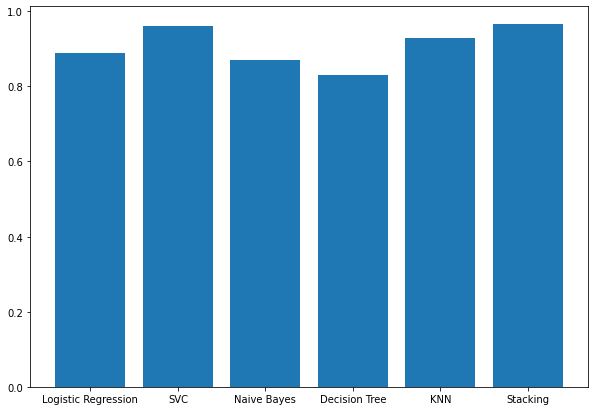

In [1]:
from matplotlib import pyplot as plt
 
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(['Logistic Regression', 'SVC', 'Naive Bayes', 'Decision Tree', 'KNN', 'Stacking'], [0.89,0.96,0.87,0.83,0.93,0.965])
 
# Show Plot
plt.show()

In this case, we can see that the stacking ensemble appears to perform better than any single model on average, achieving an accuracy of about 96.5 percent.

## Conclusion
Stacking is intended to improve modelling performance, although it is not guaranteed to do so in all situations.

Achieving an improvement in performance depends on the complexity of the problem and whether it is sufficiently well represented by the training data and complex enough that there is more to learn by combining predictions. It also depends on the underlying models chosen and whether or not they are sufficiently skillful and uncorrelated in their predictions (or errors).

Given its lesser complexity (e.g., it's easier to define, train, and maintain), the base model should be used instead of the stacking ensemble if it performs as well as or better than the stacking ensemble.

## References
- https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/
- https://towardsdatascience.com/stacking-classifiers-for-higher-predictive-performance-566f963e4840

## Contributed By:
Nikita Bhrugumaharshi Emberi </br>
Domain-Machine Learning </br>
Batch-6 </br>
Serial No-992 </br>
[@NikitaEmberi](https://github.com/NikitaEmberi)